In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15

In [3]:
df = pd.read_csv("Seoul/merge_2021.csv", encoding='ms949')

In [4]:
df.head()

,id,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,...,3코너,G-3F,4코너,G-1F,경주기록,날짜,날씨,주로상태,등급,거리
0,0,1,11,바이스로이,한,거,3세,56,이혁,임봉춘,...,00:24.2,00:36.2,00:42.4,,01:13.3,2021년05월16일(일),비,불량,국6,1200M
1,1,2,12,탑퀄리티,한,거,3세,56,박태종,박종곤,...,00:24.3,00:36.3,00:42.5,,01:14.2,2021년05월16일(일),비,불량,국6,1200M
2,2,3,8,유정챔프,한,수,3세,56,이철경,서인석,...,00:25.2,00:37.2,00:43.3,,01:14.7,2021년05월16일(일),비,불량,국6,1200M
3,3,4,10,방탄여걸,한,암,3세,54,하정훈,이관호,...,00:25.3,00:37.4,00:43.6,,01:15.2,2021년05월16일(일),비,불량,국6,1200M
4,4,5,6,로열영광,한,수,3세,56,문성혁,박병일,...,00:25.5,00:37.6,00:43.9,,01:15.4,2021년05월16일(일),비,불량,국6,1200M


<AxesSubplot:>

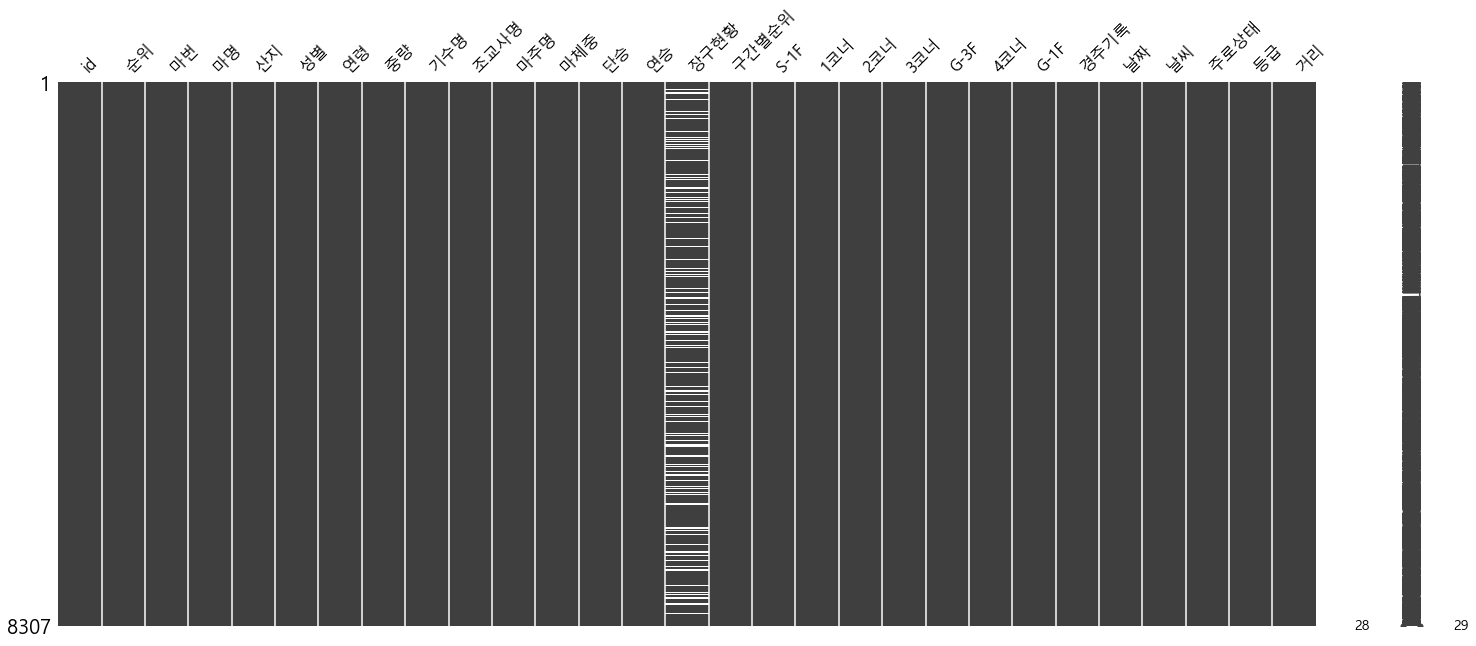

In [5]:
msno.matrix(df)

<AxesSubplot:xlabel='중량', ylabel='count'>

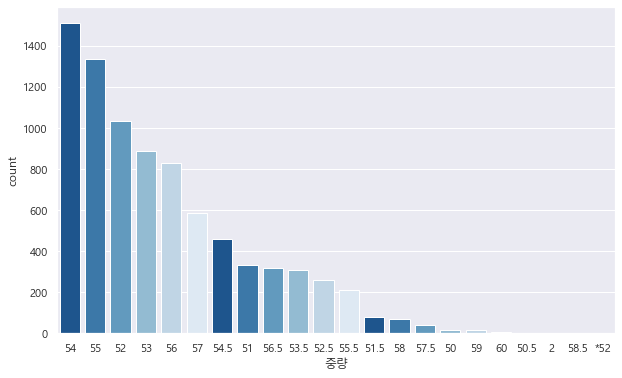

In [6]:
sns.set(style='darkgrid')
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='중량', palette=sns.color_palette("Blues_r"), order=df['중량'].value_counts().index)

<AxesSubplot:xlabel='기수명', ylabel='count'>

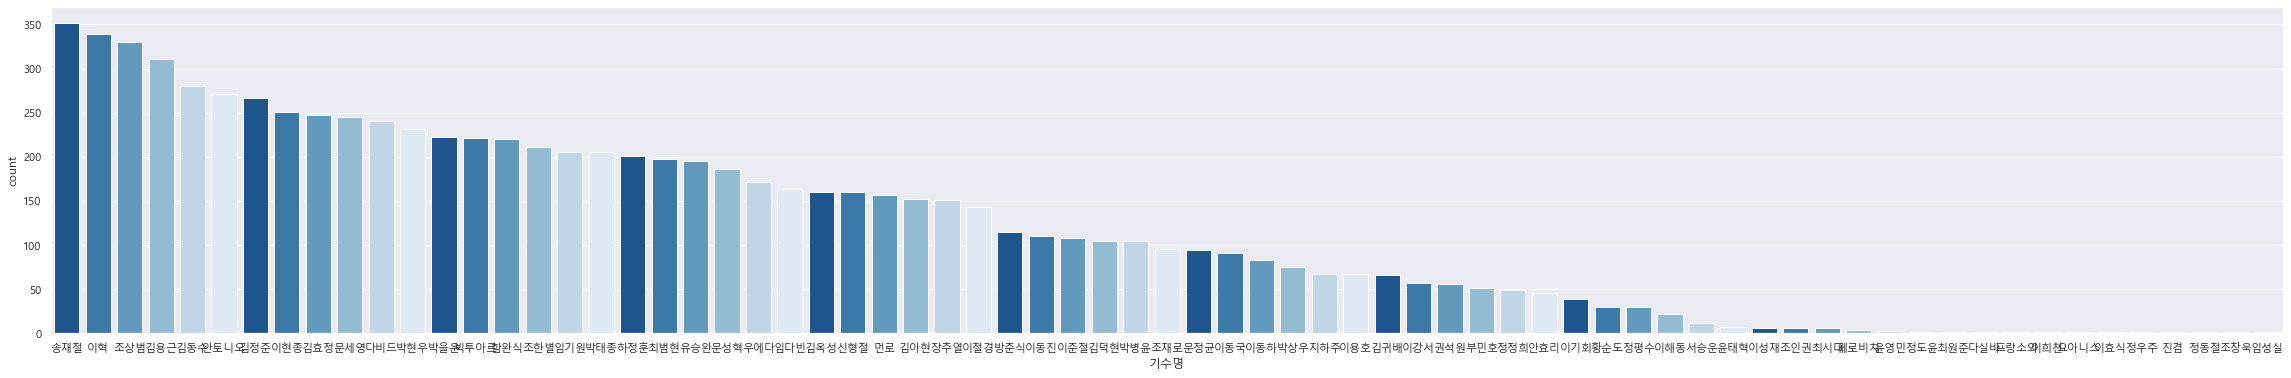

In [7]:
sns.set(style='darkgrid')
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.figure(figsize=(40,6))
sns.countplot(data=df, x='기수명', palette=sns.color_palette("Blues_r"), order=df['기수명'].value_counts().index)

<AxesSubplot:xlabel='등급', ylabel='순위'>

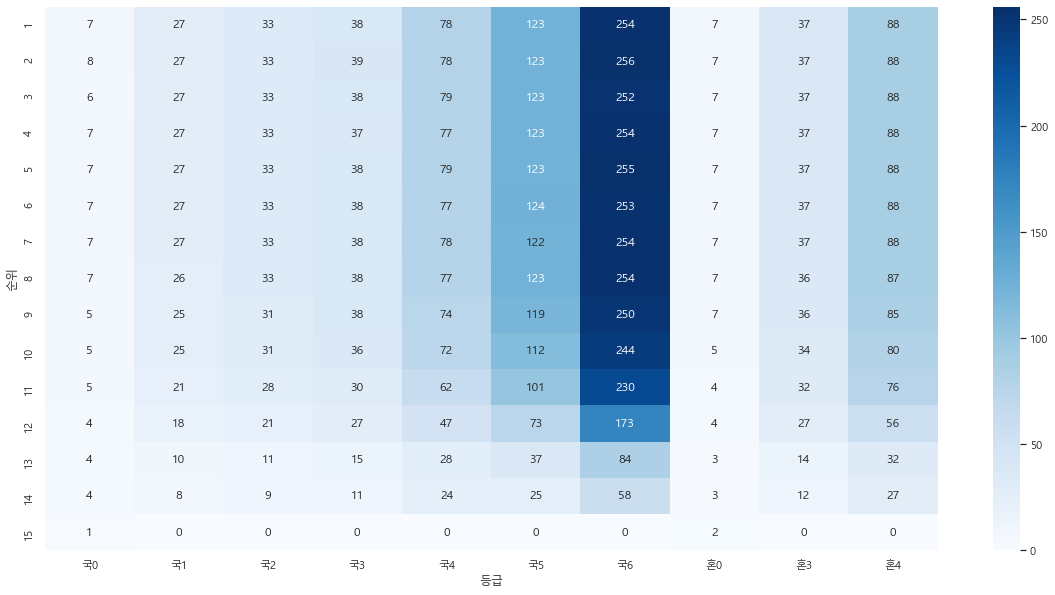

In [8]:
df_p = df.pivot_table(index="순위", columns="등급", aggfunc='size')
df_p = df_p.fillna(0)
plt.figure(figsize=(20,10))
sns.heatmap(df_p, cmap="Blues", annot=True, fmt='.0f')

In [9]:
raw1 = pd.read_csv("Seoul/merge_2021.csv", encoding='ms949', engine='python')
raw1.head()

,id,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,...,3코너,G-3F,4코너,G-1F,경주기록,날짜,날씨,주로상태,등급,거리
0,0,1,11,바이스로이,한,거,3세,56,이혁,임봉춘,...,00:24.2,00:36.2,00:42.4,,01:13.3,2021년05월16일(일),비,불량,국6,1200M
1,1,2,12,탑퀄리티,한,거,3세,56,박태종,박종곤,...,00:24.3,00:36.3,00:42.5,,01:14.2,2021년05월16일(일),비,불량,국6,1200M
2,2,3,8,유정챔프,한,수,3세,56,이철경,서인석,...,00:25.2,00:37.2,00:43.3,,01:14.7,2021년05월16일(일),비,불량,국6,1200M
3,3,4,10,방탄여걸,한,암,3세,54,하정훈,이관호,...,00:25.3,00:37.4,00:43.6,,01:15.2,2021년05월16일(일),비,불량,국6,1200M
4,4,5,6,로열영광,한,수,3세,56,문성혁,박병일,...,00:25.5,00:37.6,00:43.9,,01:15.4,2021년05월16일(일),비,불량,국6,1200M


In [10]:
raw = raw1[["순위","마번","마명","산지","성별","연령","중량", "기수명", "조교사명", "마체중",
 "단승","연승","S-1F", "3코너", "4코너", "G-3F", "날씨", "등급", "거리"]]
raw.columns=["순위","마번","마명","산지","성별","연령","중량", "기수명", "조교사명", "마체중", 
             "단승","연승","S1F", "TCornor", "FCornor", "G3F", "날씨", "등급", "거리"]
raw.head()

,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,마체중,단승,연승,S1F,TCornor,FCornor,G3F,날씨,등급,거리
0,1,11,바이스로이,한,거,3세,56,이혁,임봉춘,463,2.6,1.4,00:13.4,00:24.2,00:42.4,00:36.2,비,국6,1200M
1,2,12,탑퀄리티,한,거,3세,56,박태종,박종곤,473,2.0,1.0,00:13.5,00:24.3,00:42.5,00:36.3,비,국6,1200M
2,3,8,유정챔프,한,수,3세,56,이철경,서인석,483,30.6,5.2,00:14.0,00:25.2,00:43.3,00:37.2,비,국6,1200M
3,4,10,방탄여걸,한,암,3세,54,하정훈,이관호,423,13.1,5.0,00:14.2,00:25.3,00:43.6,00:37.4,비,국6,1200M
4,5,6,로열영광,한,수,3세,56,문성혁,박병일,458,19.8,1.2,00:14.2,00:25.5,00:43.9,00:37.6,비,국6,1200M


In [11]:
import datetime
S1F=[]
for i in raw.S1F:
    S1F.append(datetime.datetime.strptime(i,"%M:%S.%f").second+datetime.datetime.strptime(i,"%M:%S.%f").microsecond/1000000)
cor3 = []
for i in raw.TCornor:
    cor3.append(datetime.datetime.strptime(i,"%M:%S.%f").minute*60+datetime.datetime.strptime(i,"%M:%S.%f").second+datetime.datetime.strptime(i,"%M:%S.%f").microsecond/1000000)
G3F=[]
for i in raw.G3F:
    G3F.append(datetime.datetime.strptime(i,"%M:%S.%f").minute*60+datetime.datetime.strptime(i,"%M:%S.%f").second+datetime.datetime.strptime(i,"%M:%S.%f").microsecond/1000000)
cor4=[]
for i in raw.FCornor:
    cor4.append(datetime.datetime.strptime(i,"%M:%S.%f").minute*60+datetime.datetime.strptime(i,"%M:%S.%f").second+datetime.datetime.strptime(i,"%M:%S.%f").microsecond/1000000)


In [12]:
S1 = pd.DataFrame(S1F)
co3 = pd.DataFrame(cor3)
G3 = pd.DataFrame(G3F)
co4 = pd.DataFrame(cor4)

In [13]:
raw = pd.concat((raw,S1), axis=1)
raw.head()


,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,마체중,단승,연승,S1F,TCornor,FCornor,G3F,날씨,등급,거리,0
0,1,11,바이스로이,한,거,3세,56,이혁,임봉춘,463,2.6,1.4,00:13.4,00:24.2,00:42.4,00:36.2,비,국6,1200M,13.4
1,2,12,탑퀄리티,한,거,3세,56,박태종,박종곤,473,2.0,1.0,00:13.5,00:24.3,00:42.5,00:36.3,비,국6,1200M,13.5
2,3,8,유정챔프,한,수,3세,56,이철경,서인석,483,30.6,5.2,00:14.0,00:25.2,00:43.3,00:37.2,비,국6,1200M,14.0
3,4,10,방탄여걸,한,암,3세,54,하정훈,이관호,423,13.1,5.0,00:14.2,00:25.3,00:43.6,00:37.4,비,국6,1200M,14.2
4,5,6,로열영광,한,수,3세,56,문성혁,박병일,458,19.8,1.2,00:14.2,00:25.5,00:43.9,00:37.6,비,국6,1200M,14.2


In [14]:
raw = pd.concat((raw,co3),axis=1)
raw.head()

,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,마체중,...,연승,S1F,TCornor,FCornor,G3F,날씨,등급,거리,0,0
0,1,11,바이스로이,한,거,3세,56,이혁,임봉춘,463,...,1.4,00:13.4,00:24.2,00:42.4,00:36.2,비,국6,1200M,13.4,24.2
1,2,12,탑퀄리티,한,거,3세,56,박태종,박종곤,473,...,1.0,00:13.5,00:24.3,00:42.5,00:36.3,비,국6,1200M,13.5,24.3
2,3,8,유정챔프,한,수,3세,56,이철경,서인석,483,...,5.2,00:14.0,00:25.2,00:43.3,00:37.2,비,국6,1200M,14.0,25.2
3,4,10,방탄여걸,한,암,3세,54,하정훈,이관호,423,...,5.0,00:14.2,00:25.3,00:43.6,00:37.4,비,국6,1200M,14.2,25.3
4,5,6,로열영광,한,수,3세,56,문성혁,박병일,458,...,1.2,00:14.2,00:25.5,00:43.9,00:37.6,비,국6,1200M,14.2,25.5


In [15]:
raw = pd.concat((raw,G3), axis=1)

In [16]:
raw.head()

,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,마체중,...,S1F,TCornor,FCornor,G3F,날씨,등급,거리,0,0,0
0,1,11,바이스로이,한,거,3세,56,이혁,임봉춘,463,...,00:13.4,00:24.2,00:42.4,00:36.2,비,국6,1200M,13.4,24.2,36.2
1,2,12,탑퀄리티,한,거,3세,56,박태종,박종곤,473,...,00:13.5,00:24.3,00:42.5,00:36.3,비,국6,1200M,13.5,24.3,36.3
2,3,8,유정챔프,한,수,3세,56,이철경,서인석,483,...,00:14.0,00:25.2,00:43.3,00:37.2,비,국6,1200M,14.0,25.2,37.2
3,4,10,방탄여걸,한,암,3세,54,하정훈,이관호,423,...,00:14.2,00:25.3,00:43.6,00:37.4,비,국6,1200M,14.2,25.3,37.4
4,5,6,로열영광,한,수,3세,56,문성혁,박병일,458,...,00:14.2,00:25.5,00:43.9,00:37.6,비,국6,1200M,14.2,25.5,37.6


In [17]:
raw = pd.concat((raw,co4),axis=1)
raw.head()

,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,마체중,...,TCornor,FCornor,G3F,날씨,등급,거리,0,0,0,0
0,1,11,바이스로이,한,거,3세,56,이혁,임봉춘,463,...,00:24.2,00:42.4,00:36.2,비,국6,1200M,13.4,24.2,36.2,42.4
1,2,12,탑퀄리티,한,거,3세,56,박태종,박종곤,473,...,00:24.3,00:42.5,00:36.3,비,국6,1200M,13.5,24.3,36.3,42.5
2,3,8,유정챔프,한,수,3세,56,이철경,서인석,483,...,00:25.2,00:43.3,00:37.2,비,국6,1200M,14.0,25.2,37.2,43.3
3,4,10,방탄여걸,한,암,3세,54,하정훈,이관호,423,...,00:25.3,00:43.6,00:37.4,비,국6,1200M,14.2,25.3,37.4,43.6
4,5,6,로열영광,한,수,3세,56,문성혁,박병일,458,...,00:25.5,00:43.9,00:37.6,비,국6,1200M,14.2,25.5,37.6,43.9


In [18]:
raw.columns

Index([     '순위',      '마번',      '마명',      '산지',      '성별',      '연령',
            '중량',     '기수명',    '조교사명',     '마체중',      '단승',      '연승',
           'S1F', 'TCornor', 'FCornor',     'G3F',      '날씨',      '등급',
            '거리',         0,         0,         0,         0],
      dtype='object')

In [19]:
del raw["S1F"]
del raw["TCornor"]
del raw["FCornor"]
del raw["G3F"]
raw.head()

,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,마체중,단승,연승,날씨,등급,거리,0,0,0,0
0,1,11,바이스로이,한,거,3세,56,이혁,임봉춘,463,2.6,1.4,비,국6,1200M,13.4,24.2,36.2,42.4
1,2,12,탑퀄리티,한,거,3세,56,박태종,박종곤,473,2.0,1.0,비,국6,1200M,13.5,24.3,36.3,42.5
2,3,8,유정챔프,한,수,3세,56,이철경,서인석,483,30.6,5.2,비,국6,1200M,14.0,25.2,37.2,43.3
3,4,10,방탄여걸,한,암,3세,54,하정훈,이관호,423,13.1,5.0,비,국6,1200M,14.2,25.3,37.4,43.6
4,5,6,로열영광,한,수,3세,56,문성혁,박병일,458,19.8,1.2,비,국6,1200M,14.2,25.5,37.6,43.9


In [20]:
raw.columns = ["순위", "마번", "마명", "산지", "성별", "연령", "중량", "기수명", "조교사명", "마체중",
              "단승", "연승", "날씨", "등급", "거리", "S1F", "3코너", "G3F", "4코너"]
raw.head()

,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,마체중,단승,연승,날씨,등급,거리,S1F,3코너,G3F,4코너
0,1,11,바이스로이,한,거,3세,56,이혁,임봉춘,463,2.6,1.4,비,국6,1200M,13.4,24.2,36.2,42.4
1,2,12,탑퀄리티,한,거,3세,56,박태종,박종곤,473,2.0,1.0,비,국6,1200M,13.5,24.3,36.3,42.5
2,3,8,유정챔프,한,수,3세,56,이철경,서인석,483,30.6,5.2,비,국6,1200M,14.0,25.2,37.2,43.3
3,4,10,방탄여걸,한,암,3세,54,하정훈,이관호,423,13.1,5.0,비,국6,1200M,14.2,25.3,37.4,43.6
4,5,6,로열영광,한,수,3세,56,문성혁,박병일,458,19.8,1.2,비,국6,1200M,14.2,25.5,37.6,43.9


In [21]:
pd.get_dummies(raw["성별"]).head()

,거,수,암
0,1,0,0
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [22]:
raw1 = raw.merge(pd.get_dummies(raw["성별"]),left_index = True,right_index = True )
raw1.head()

,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,마체중,...,날씨,등급,거리,S1F,3코너,G3F,4코너,거,수,암
0,1,11,바이스로이,한,거,3세,56,이혁,임봉춘,463,...,비,국6,1200M,13.4,24.2,36.2,42.4,1,0,0
1,2,12,탑퀄리티,한,거,3세,56,박태종,박종곤,473,...,비,국6,1200M,13.5,24.3,36.3,42.5,1,0,0
2,3,8,유정챔프,한,수,3세,56,이철경,서인석,483,...,비,국6,1200M,14.0,25.2,37.2,43.3,0,1,0
3,4,10,방탄여걸,한,암,3세,54,하정훈,이관호,423,...,비,국6,1200M,14.2,25.3,37.4,43.6,0,0,1
4,5,6,로열영광,한,수,3세,56,문성혁,박병일,458,...,비,국6,1200M,14.2,25.5,37.6,43.9,0,1,0


In [23]:
raw2 = raw1.merge(pd.get_dummies(
    raw["날씨"]),left_index = True,right_index = True )
raw2.head()

,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,마체중,...,S1F,3코너,G3F,4코너,거,수,암,맑음,비,흐림
0,1,11,바이스로이,한,거,3세,56,이혁,임봉춘,463,...,13.4,24.2,36.2,42.4,1,0,0,0,1,0
1,2,12,탑퀄리티,한,거,3세,56,박태종,박종곤,473,...,13.5,24.3,36.3,42.5,1,0,0,0,1,0
2,3,8,유정챔프,한,수,3세,56,이철경,서인석,483,...,14.0,25.2,37.2,43.3,0,1,0,0,1,0
3,4,10,방탄여걸,한,암,3세,54,하정훈,이관호,423,...,14.2,25.3,37.4,43.6,0,0,1,0,1,0
4,5,6,로열영광,한,수,3세,56,문성혁,박병일,458,...,14.2,25.5,37.6,43.9,0,1,0,0,1,0


In [24]:
raw3 = raw2.merge(pd.get_dummies(
    raw["기수명"]),left_index = True,right_index = True )
raw3.head()

,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,마체중,...,지하주,진겸,최범현,최시대,최원준,페로비치,프랑소와,하정훈,함완식,황순도
0,1,11,바이스로이,한,거,3세,56,이혁,임봉춘,463,...,0,0,0,0,0,0,0,0,0,0
1,2,12,탑퀄리티,한,거,3세,56,박태종,박종곤,473,...,0,0,0,0,0,0,0,0,0,0
2,3,8,유정챔프,한,수,3세,56,이철경,서인석,483,...,0,0,0,0,0,0,0,0,0,0
3,4,10,방탄여걸,한,암,3세,54,하정훈,이관호,423,...,0,0,0,0,0,0,0,1,0,0
4,5,6,로열영광,한,수,3세,56,문성혁,박병일,458,...,0,0,0,0,0,0,0,0,0,0


In [25]:
raw4 = raw3.merge(pd.get_dummies(
    raw["등급"]),left_index = True,right_index = True )
raw4.head()

,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,마체중,...,국0,국1,국2,국3,국4,국5,국6,혼0,혼3,혼4
0,1,11,바이스로이,한,거,3세,56,이혁,임봉춘,463,...,0,0,0,0,0,0,1,0,0,0
1,2,12,탑퀄리티,한,거,3세,56,박태종,박종곤,473,...,0,0,0,0,0,0,1,0,0,0
2,3,8,유정챔프,한,수,3세,56,이철경,서인석,483,...,0,0,0,0,0,0,1,0,0,0
3,4,10,방탄여걸,한,암,3세,54,하정훈,이관호,423,...,0,0,0,0,0,0,1,0,0,0
4,5,6,로열영광,한,수,3세,56,문성혁,박병일,458,...,0,0,0,0,0,0,1,0,0,0


In [26]:
raw5 = raw4.merge(pd.get_dummies(
    raw["조교사명"]),left_index = True,right_index = True )
raw4.head()

,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,마체중,...,국0,국1,국2,국3,국4,국5,국6,혼0,혼3,혼4
0,1,11,바이스로이,한,거,3세,56,이혁,임봉춘,463,...,0,0,0,0,0,0,1,0,0,0
1,2,12,탑퀄리티,한,거,3세,56,박태종,박종곤,473,...,0,0,0,0,0,0,1,0,0,0
2,3,8,유정챔프,한,수,3세,56,이철경,서인석,483,...,0,0,0,0,0,0,1,0,0,0
3,4,10,방탄여걸,한,암,3세,54,하정훈,이관호,423,...,0,0,0,0,0,0,1,0,0,0
4,5,6,로열영광,한,수,3세,56,문성혁,박병일,458,...,0,0,0,0,0,0,1,0,0,0


In [27]:
raw5.head()

,순위,마번,마명,산지,성별,연령,중량,기수명,조교사명,마체중,...,지용철,최기홍,최봉주,최상식,최영주,최용건,최용구,토니,토마스,홍대유
0,1,11,바이스로이,한,거,3세,56,이혁,임봉춘,463,...,0,0,0,0,0,0,0,0,0,0
1,2,12,탑퀄리티,한,거,3세,56,박태종,박종곤,473,...,0,0,0,0,0,0,0,0,0,0
2,3,8,유정챔프,한,수,3세,56,이철경,서인석,483,...,0,0,0,0,0,0,0,0,0,0
3,4,10,방탄여걸,한,암,3세,54,하정훈,이관호,423,...,0,0,0,0,0,0,0,0,0,0
4,5,6,로열영광,한,수,3세,56,문성혁,박병일,458,...,0,0,0,0,0,0,0,0,0,0


In [28]:
del raw5["기수명"]
del raw5["조교사명"]
raw5.head()

,순위,마번,마명,산지,성별,연령,중량,마체중,단승,연승,...,지용철,최기홍,최봉주,최상식,최영주,최용건,최용구,토니,토마스,홍대유
0,1,11,바이스로이,한,거,3세,56,463,2.6,1.4,...,0,0,0,0,0,0,0,0,0,0
1,2,12,탑퀄리티,한,거,3세,56,473,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,3,8,유정챔프,한,수,3세,56,483,30.6,5.2,...,0,0,0,0,0,0,0,0,0,0
3,4,10,방탄여걸,한,암,3세,54,423,13.1,5.0,...,0,0,0,0,0,0,0,0,0,0
4,5,6,로열영광,한,수,3세,56,458,19.8,1.2,...,0,0,0,0,0,0,0,0,0,0


In [29]:
del raw5["성별"]
del raw5["날씨"]
del raw5["등급"]
raw5.head()

,순위,마번,마명,산지,연령,중량,마체중,단승,연승,거리,...,지용철,최기홍,최봉주,최상식,최영주,최용건,최용구,토니,토마스,홍대유
0,1,11,바이스로이,한,3세,56,463,2.6,1.4,1200M,...,0,0,0,0,0,0,0,0,0,0
1,2,12,탑퀄리티,한,3세,56,473,2.0,1.0,1200M,...,0,0,0,0,0,0,0,0,0,0
2,3,8,유정챔프,한,3세,56,483,30.6,5.2,1200M,...,0,0,0,0,0,0,0,0,0,0
3,4,10,방탄여걸,한,3세,54,423,13.1,5.0,1200M,...,0,0,0,0,0,0,0,0,0,0
4,5,6,로열영광,한,3세,56,458,19.8,1.2,1200M,...,0,0,0,0,0,0,0,0,0,0


In [30]:
del raw5["마명"]
del raw5["산지"]
raw5.head()

,순위,마번,연령,중량,마체중,단승,연승,거리,S1F,3코너,...,지용철,최기홍,최봉주,최상식,최영주,최용건,최용구,토니,토마스,홍대유
0,1,11,3세,56,463,2.6,1.4,1200M,13.4,24.2,...,0,0,0,0,0,0,0,0,0,0
1,2,12,3세,56,473,2.0,1.0,1200M,13.5,24.3,...,0,0,0,0,0,0,0,0,0,0
2,3,8,3세,56,483,30.6,5.2,1200M,14.0,25.2,...,0,0,0,0,0,0,0,0,0,0
3,4,10,3세,54,423,13.1,5.0,1200M,14.2,25.3,...,0,0,0,0,0,0,0,0,0,0
4,5,6,3세,56,458,19.8,1.2,1200M,14.2,25.5,...,0,0,0,0,0,0,0,0,0,0


In [31]:
raw5.to_csv("2021_dummie.csv", encoding = 'ms949')